In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import accuracy_score
from skimage import feature

In [2]:
def load_dataset(path, classes):
    class_images = []
    
    for cls in classes :
        cls_imgs = []
        img_names = os.listdir(path + cls + "/")
        i=0
        for img_name in img_names :
            cls_imgs.append(cv2.resize(cv2.imread(path + cls + "/" + img_name), (300, 200)))
            if(i==100): break
            i+=1
        class_images.append(np.array(cls_imgs))
    return class_images

In [3]:
data = load_dataset("./Data/train/", ["Parasitized", "Uninfected"])

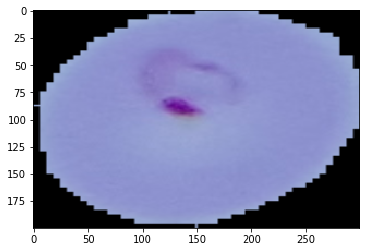

In [4]:
sample_img = data[0][0]
plt.imshow(sample_img)

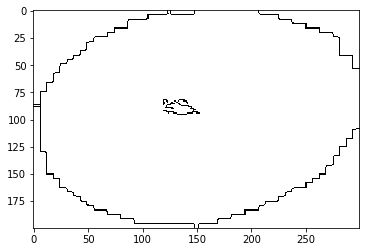

In [5]:
gray = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY) 
edged = cv2.Canny(gray, 50, 150) 
plt.imshow(edged, cmap="binary")

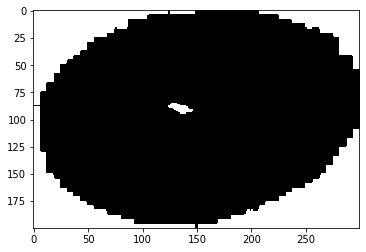

In [6]:
thresholded = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresholded[1], cmap = "binary")

In [4]:
sift = cv2.xfeatures2d.SURF_create()
kp, des = sift.detectAndCompute(gray,None)

copy = cv2.drawKeypoints(gray,kp, outImage = None)
plt.imshow(copy[:, :, [2, 1, 0]])

error: OpenCV(4.1.1) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'
